# MODULE 3 PROJECT

The intention of this project is to build a machine learning algorithm that predicts whether or not a water well in Tanzania is about to break and is in need of repair.

### Importing necessary packages

In [241]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, auc, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Importing the datasets

In [242]:
# importing the independent training set
df= pd.read_csv('independent_training_set.csv')

In [243]:
# importing the dependent trainig set
dfy = pd.read_csv("dependent_training_set.csv")

In [244]:
# combing the two data frames
df = pd.concat([dfy,df], axis =1)

In [245]:
# displaying max columns
pd.set_option('display.max_columns', 100)

In [246]:
# displaying the data frame
df.head()

,id,status_group,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [247]:
# checking the shape
df.shape

(59400, 42)

In [248]:
# checking the columns
df.columns

Index(['id', 'status_group', 'id', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [249]:
# checking the data types for each of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 42 columns):
id                       59400 non-null int64
status_group             59400 non-null object
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
p

In [250]:
# obtaining a summary of the columns with numerical values
df.describe()

,id,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


### Checking nan values

In [251]:
#detecting nan values in dataframe
df.isna().values.any()

True

In [252]:
#locating where the nan values exist and the amount of nan values for each columns
df.isna().sum()

id                           0
status_group                 0
id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_

schemename has a very high amount of nan values. Therefore it can be suggested that these nan values were intentional.

### Dealing with nan values

In [253]:
# funder- the person/company that funded the wells

In [254]:
# checking the value counts
df.funder.value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Nyamingu Subvillage          1
Kauzeni                      1
Hesswa                       1
Waheke                       1
Mzee Sh                      1
Name: funder, Length: 1897, dtype: int64

In [255]:
# seperating the top 5 companies that funded the wells

def group_funder(row):
    '''seperating the top 5 companies that funded the wells'''
    if row['funder']=='Government Of Tanzania':
        return 'Government'
    if row['funder']=='DANIDA':
        return 'Danida'
    if row['funder']=='HESAWA':
        return 'Hesawa'
    else:
        return 'Other'
    
df['funder'] = df.apply(lambda row: group_funder(row), axis=1)

In [256]:
df.public_meeting

0        True
1         NaN
2        True
3        True
4        True
         ... 
59395    True
59396    True
59397    True
59398    True
59399    True
Name: public_meeting, Length: 59400, dtype: object

In [257]:
#permit

In [258]:
df.permit

0        False
1         True
2         True
3         True
4         True
         ...  
59395     True
59396     True
59397    False
59398     True
59399     True
Name: permit, Length: 59400, dtype: object

In [259]:
# installer- organization that installed the well

In [260]:
df.installer.value_counts()

DWE                17402
Government          1825
RWE                 1206
Commu               1060
DANIDA              1050
                   ...  
inkinda                1
Not kno                1
nchagwa                1
Local technical        1
KKKT Katiti juu        1
Name: installer, Length: 2145, dtype: int64

In [261]:
# seperating the top 5 companies that installed the wells

def group_installer(row):
    '''seperating the top 5 companies that funded the wells'''
    if row['installer']=='DWE':
        return 'DWE'
    if row['installer']=='Government':
        return 'Government'
    if row['installer']=='RWE':
        return 'RWE'  
    else:
        return 'Other'
    
df['installer'] = df.apply(lambda row: group_installer(row), axis=1)

In [262]:
df.scheme_name.value_counts()

K                        682
None                     644
Borehole                 546
Chalinze wate            405
M                        400
                        ... 
Oloirien water scheme      1
Upper River                1
Nyashimo                   1
Kirachi water supply       1
Sanire water supply        1
Name: scheme_name, Length: 2696, dtype: int64

In [263]:
# seperating the top 5 companies that installed the wells

def group_sn(row):
    '''seperating the top 3 schemes'''
    if row['scheme_name']=='K':
        return 'K'
    if row['scheme_name']=='None':
        return 'None'
    if row['scheme_name']=='Borehole':
        return 'Borehole'  
    else:
        return 'Other'
    
df['scheme_name'] = df.apply(lambda row: group_sn(row), axis=1)

In [264]:
df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [265]:
# seperating the top 3 scheme managements

def group_sm(row):
    '''seperating the top 3 schemes'''
    if row['scheme_management']=='VWC':
        return 'VWC'
    if row['scheme_management']=='WUG':
        return 'WUG'
    if row['scheme_management']=='Water authority':
        return 'Water authority'  
    else:
        return 'Other'
    
df['scheme_management'] = df.apply(lambda row: group_sm(row), axis=1)

In [266]:
df['date_recorded'] = pd.to_datetime(df['date_recorded'])

In [267]:
df = df.dropna()

In [268]:
#detecting nan values in dataframe
df.isna().values.any()

False

In [272]:
# seperating region by nwse
def myfunc(x): 
    if x=='Iringa' or x=='Tabora' or x=='Dodoma' or x=='Singida':
        return 'central'
    elif x=='Mara' or x=='Manyara' or x=='Kagera'or x=='Shingyanga' or x=='Kilimanjaro' or x=='Mwanza' or x=='Arusha': 
        return 'north'
    elif x=='Mtwara' or x=='Tanga' or x=='Pwani' or x=='Lindi' or x=='Morogoro':
        return 'east'
    elif x=='Ruvuma':
        return 'south'
    else:
        return 'west'

df['area'] = df.apply(lambda x: myfunc(x.region), axis=1)
df.drop(columns='region').head()

,id,status_group,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,area
0,69572,functional,69572,6000.0,2011-03-14,Other,1390,Other,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Other,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,central
2,34310,functional,34310,25.0,2013-02-25,Other,686,Other,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Other,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,north
3,67743,non functional,67743,0.0,2013-01-28,Other,263,Other,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,Other,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,east
4,19728,functional,19728,0.0,2011-07-13,Other,0,Other,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,Other,Other,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,north
5,9944,functional,9944,20.0,2011-03-13,Other,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Other,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,east


In [273]:
df.status_group.unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [274]:
df.status_group.value_counts()

functional                 28861
non functional             20184
functional needs repair     3866
Name: status_group, dtype: int64

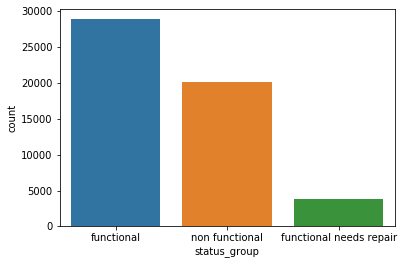

In [275]:
sns.countplot(df.status_group, data=df)

There is evident class imbalance with the predictor variable, therefore to improve this we can combine 'non functional' and 'functional needs repair' together to create a binary classification instead of a multiclass classification.

In [276]:
# combining the two groups
df.loc[df['status_group'] == 'functional needs repair'] = 'non functional'

In [277]:
# checking the value counts
df.status_group.value_counts()

functional        28861
non functional    24050
Name: status_group, dtype: int64

The class imbalance issue has been solved with this as there is an almost even number between non functional and functional values

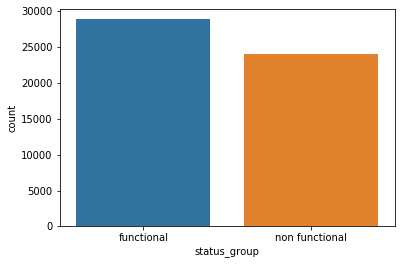

In [278]:
# creating a bar plot
sns.countplot(df.status_group, data=df)

In [279]:
df.head()

,id,status_group,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,area
0,69572,functional,69572,6000,2011-03-14 00:00:00,Other,1390,Other,34.9381,-9.85632,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Other,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,central
2,34310,functional,34310,25,2013-02-25 00:00:00,Other,686,Other,37.4607,-3.82133,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Other,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,north
3,67743,non functional,67743,0,2013-01-28 00:00:00,Other,263,Other,38.4862,-11.1553,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,Other,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,east
4,19728,functional,19728,0,2011-07-13 00:00:00,Other,0,Other,31.1308,-1.82536,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,Other,Other,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,north
5,9944,functional,9944,20,2011-03-13 00:00:00,Other,0,DWE,39.1728,-4.76559,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Other,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,east


In [280]:
df.columns

Index(['id', 'status_group', 'id', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'area'],
      dtype='object')

In [281]:
# creating a dataframe with the selected columns
dfFinal = df[['status_group', 'basin',
       'extraction_type_class','management','quality_group',
       'source_type','waterpoint_type_group','area']]

In [282]:
# creating dummy variables for all the categorical data
dfFinal = pd.get_dummies(dfFinal, columns=['status_group', 'basin',
       'extraction_type_class','management','quality_group',
       'source_type','waterpoint_type_group','area'],drop_first=True)

In [283]:
# displaying the result of the final data frame after dummy variables have been created
dfFinal.head()

,status_group_non functional,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,basin_non functional,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_non functional,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_non functional,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_non functional,quality_group_salty,quality_group_unknown,source_type_dam,source_type_non functional,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_non functional,waterpoint_type_group_other,area_east,area_non functional,area_north,area_south,area_west
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


### Splitting X and y from the cleaned data frame

In [284]:
# splitting the target and predictor variables
X = dfFinal.drop('status_group_non functional',axis=1)
y = dfFinal['status_group_non functional']
X.head() 

,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,basin_non functional,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_non functional,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_non functional,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_non functional,quality_group_salty,quality_group_unknown,source_type_dam,source_type_non functional,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_non functional,waterpoint_type_group_other,area_east,area_non functional,area_north,area_south,area_west
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


# DATA PREPARATION

### Splitting X and y into train and test datasets

In [285]:
# completing a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.8, random_state=42)

### Scaling train, test and validation datasets

In [286]:
# splitting train set into train and validation data sets
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, train_size =0.8, random_state=42)

In [287]:
# Scaling the data
scaler = preprocessing.StandardScaler()

In [288]:
# scaling the data
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# INITAL LOGISITIC REGRESSION MODEL

### Training a logistic regression model

In [289]:
# fitting the model to train dataset
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Measuring accuracy

In [290]:
# obtaining predictions from the validation data set
y_predicted_val = logreg.predict(X_val)

In [291]:
# obtaining predictions from the train data set
y_predicted_train = logreg.predict(X_train)

In [292]:
# calculating the accuracy
accuracy_score_validation = accuracy_score(y_val,y_predicted_val)

In [293]:
# calculating the accuracy
accuracy_score_train = accuracy_score(y_train,y_predicted_train)

In [294]:
# printing the accuracy score
print('Accuracy score for train: {}'.format(accuracy_score_train.round(2)))
print('Accuracy score for validation: {}'.format(accuracy_score_validation.round(2)))

Accuracy score for train: 0.73
Accuracy score for validation: 0.74


In [295]:
residuals = np.abs(y_val - y_predicted_val)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0      6234
1      1699
255     533
Name: status_group_non functional, dtype: int64
------------------------------------
0      0.736357
1      0.200685
255    0.062958
Name: status_group_non functional, dtype: float64


### Measuring ROC_AUC

In [296]:
y_prob_val = model_log.predict_proba(X_val)[:,1]

In [297]:
y_prob_train = model_log.predict_proba(X_train)[:,1]

In [298]:
# calculating the ROC_AUC
roc_score_validation = roc_auc_score(y_val,y_prob_val)

In [299]:
# calculating the ROC_AUC
roc_score_train = roc_auc_score(y_train,y_prob_train)

In [300]:
print('ROC_AUC score for train: {}'.format(roc_score_train.round(2)))
print('ROC_AUC score for validation: {}'.format(roc_score_validation.round(2)))

ROC_AUC score for train: 0.78
ROC_AUC score for validation: 0.79


### Measuring R2, MSE and MAE

In [301]:
print("R squared score =", r2_score(y_val,y_predicted_val))
print("Mean Squared Error =", mean_squared_error(y_val,y_predicted_val))
print("Mean Absolute Error =", mean_absolute_error(y_val,y_predicted_val))

R squared score = -0.06359962735958713
Mean Squared Error = 0.26364280652019845
Mean Absolute Error = 51.237656508386486


The accuracy scores and the ROC_AUC scores were shown to be quite decent, as there is no evident overfitting or jump between the validation and the train data sets.

# APPLYING L1 LASSO REGULARIZATION

To further see if we can improve this model L1 regularization will be applied to it.

In [302]:
# training the logisitc regression with L1 (lasso) regularisation
# lasso regularisation allows you to shrink the coefficients pushing them to 0
lasso = LogisticRegression(penalty='l1', solver='liblinear')
lasso.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Measuring accuracy

In [303]:
# obtaining predictions from the val data set
y_predicted_val_lasso = lasso.predict(X_val)

In [304]:
# obtaining predictions from the val data set
y_predicted_train_lasso = lasso.predict(X_train)

In [305]:
residuals = np.abs(y_val - y_predicted_val_lasso)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0      6234
1      1699
255     533
Name: status_group_non functional, dtype: int64
------------------------------------
0      0.736357
1      0.200685
255    0.062958
Name: status_group_non functional, dtype: float64


In [306]:
residuals = np.abs(y_train - y_predicted_train_lasso)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0      24551
1       7195
255     2116
Name: status_group_non functional, dtype: int64
------------------------------------
0      0.725031
1      0.212480
255    0.062489
Name: status_group_non functional, dtype: float64


### Meauring ROC_AUC

In [307]:
val_prob_lasso = lasso.predict_proba(X_val)[:,1]
train_prob_lasso = lasso.predict_proba(X_train)[:,1]

In [308]:
roc_score_lasso_val = roc_auc_score(y_val,val_prob_lasso)
roc_score_lasso_train = roc_auc_score(y_train,train_prob_lasso)

In [309]:
print('ROC_AUC score for train: {}'.format(roc_score_lasso_train.round(2)))
print('ROC_AUC score for validation: {}'.format(roc_score_lasso_val.round(2)))

ROC_AUC score for train: 0.78
ROC_AUC score for validation: 0.79


### Measuring R2, MSE and MAE

In [310]:
print("R squared score =", r2_score(y_val,y_predicted_val_lasso))
print("Mean Squared Error =", mean_squared_error(y_val,y_predicted_val_lasso))
print("Mean Absolute Error =", mean_absolute_error(y_val,y_predicted_val_lasso))

R squared score = -0.06359962735958713
Mean Squared Error = 0.26364280652019845
Mean Absolute Error = 51.237656508386486


Both the inital model and the model with the L1 regularization applied to it had the same accuracy and ROC_AUC score, showing that there is no change in these scores despite having lasso regularization applied to this recent model.

# DECISION TREE CLASSIFIER

In [311]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [312]:
# fitting the model to the train data set
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [313]:
def scores(model,X_train,X_val,y_train,y_val):
    train_prob = model.predict_proba(X_train)[:,1]
    val_prob = model.predict_proba(X_val)[:,1]
    train = roc_auc_score(y_train,train_prob)
    val = roc_auc_score(y_val,val_prob)
    print('train:',round(train,2),'validation:',round(val,2))

In [314]:
def annot(fpr,tpr,thr):
    k=0
    for i,j in zip(fpr,tpr):
        if k %50 == 0:
            plt.annotate(round(thr[k],2),xy=(i,j), textcoords='data')
        k+=1

In [315]:
def roc_plot(model,X_train,y_train,X_val,y_val):
    train_prob = model.predict_proba(X_train)[:,1]
    val_prob = model.predict_proba(X_val)[:,1]
    plt.figure(figsize=(7,7))
    for data in [[y_train, train_prob],[y_val, val_prob]]: # ,[y_test, test_prob]
        fpr, tpr, threshold = roc_curve(data[0], data[1])
        plt.plot(fpr, tpr)
    annot(fpr, tpr, threshold)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.ylabel('TPR (power)')
    plt.xlabel('FPR (alpha)')
    plt.legend(['train','val'])
    plt.show()

In [316]:
def opt_plots(opt_model):
    opt = pd.DataFrame(opt_model.cv_results_)
    cols = [col for col in opt.columns if ('mean' in col or 'std' in col) and 'time' not in col]
    params = pd.DataFrame(list(opt.params))
    opt = pd.concat([params,opt[cols]],axis=1,sort=False)
    
    plt.figure(figsize=[15,4])
    plt.subplot(121)
    sns.heatmap(pd.pivot_table(opt,index='max_depth',columns='min_samples_leaf',values='mean_train_score')*100)
    plt.title('ROC_AUC - Training')
    plt.subplot(122)
    sns.heatmap(pd.pivot_table(opt,index='max_depth',columns='min_samples_leaf',values='mean_test_score')*100)
    plt.title('ROC_AUC - Validation')
#     return opt

train: 0.85 validation: 0.82


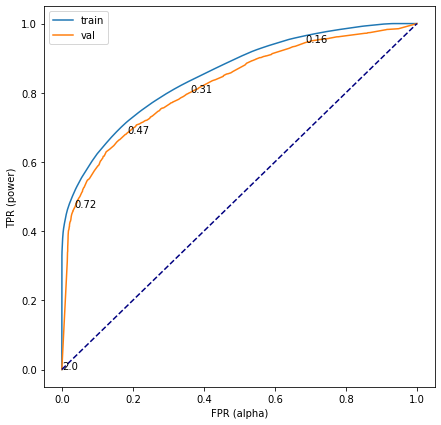

In [317]:
# plotting roc curve
scores(model,X_train,X_val,y_train,y_val)
roc_plot(model,X_train,y_train,X_val,y_val)

### Grid search CV

In [318]:
skf = StratifiedKFold(n_splits=5,random_state=42)

In [319]:
# setting up the parameters 
param_grid = {'max_depth':range(10,50+1,10),'min_samples_leaf':[5,50,500]}

train: 0.84 validation: 0.82
{'max_depth': 20, 'min_samples_leaf': 5}


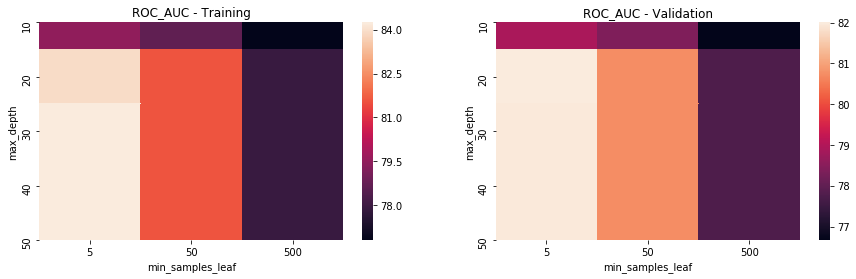

In [320]:
opt_model = GridSearchCV(model,param_grid,cv=skf,scoring='roc_auc',return_train_score=True,n_jobs=-1)
opt_model.fit(X_train,y_train)
best_model = opt_model.best_estimator_

scores(best_model,X_train,X_val,y_train,y_val)
print(opt_model.best_params_)
opt_plots(opt_model)

train: 0.84 validation: 0.82


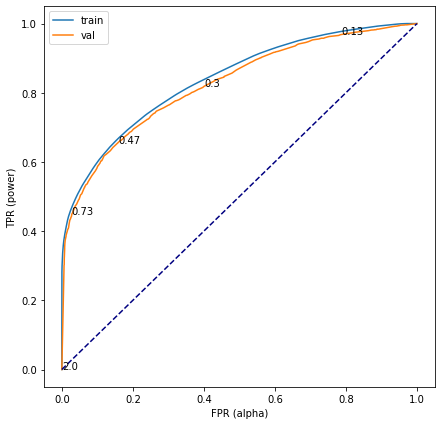

In [321]:
scores(opt_model,X_train,X_val,y_train,y_val)
roc_plot(opt_model,X_train,y_train,X_val,y_val)

# HYPERPARAMETER TUNING 

### Identifying optimal tree depth

In [322]:
# Import metrics
from sklearn.metrics import r2_score, mean_squared_error 

[0.9228556485355649, 0.4719999999999998]

In [ ]:
# Define the function
def performance(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the r2 score between 'y_true' and 'y_predict'
    r2 = r2_score(y_true, y_predict)
    
    # Calculate the mean squared error between 'y_true' and 'y_predict'
    mse = mean_squared_error(y_true, y_predict)
    
    # Return the score
    return [r2, mse]

In [ ]:
# Testing the function
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

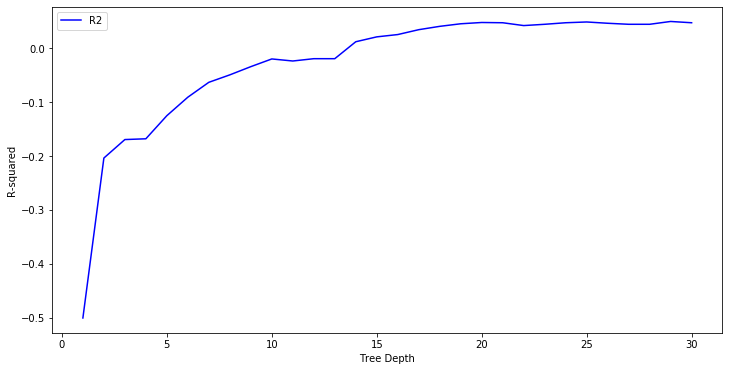

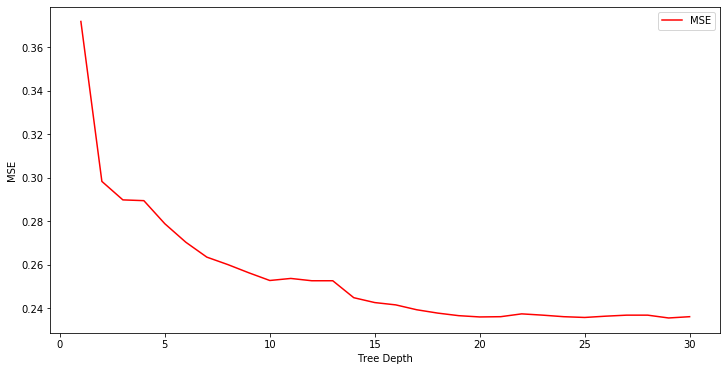

In [323]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 30, 30, endpoint=True)
mse_results = []
r2_results = []

for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=45)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = performance(y_val, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(max_depths, mse_results, 'r', label='MSE')
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.legend()
plt.show()

### Finding optimal minimal split

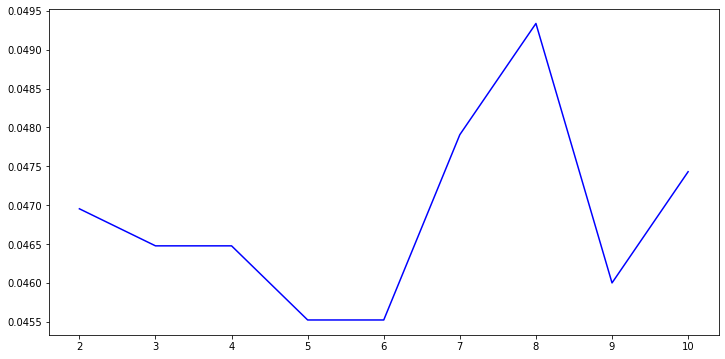

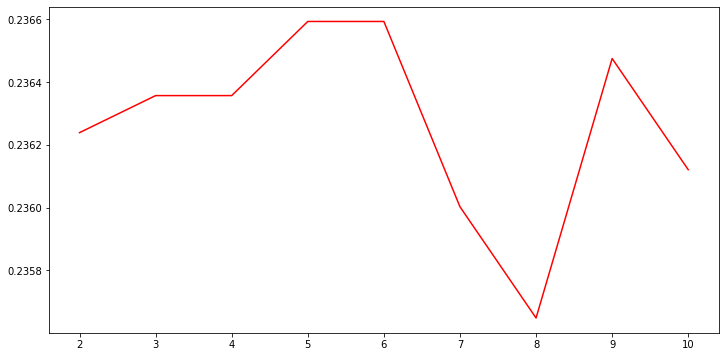

In [324]:
# Identify the optimal minimum split size for given data
min_samples_splits = np.arange(2, 11)
mse_results = []
r2_results = []

for min_samples_split in min_samples_splits:
    model = DecisionTreeClassifier(min_samples_split=int(min_samples_split), random_state=45)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = performance(y_val, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, r2_results, 'b', label='R2')
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, mse_results, 'r', label='MSE')
plt.show()

# RUNNING THE OPTIMIZED MODEL

In [325]:
model = DecisionTreeClassifier(min_samples_split=5, max_depth=30, criterion='entropy', random_state=45)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=30,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=45, splitter='best')

In [326]:
y_pred = model.predict(X_val) 

In [327]:
residuals = np.abs(y_val - y_pred)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0      6465
1      1429
255     572
Name: status_group_non functional, dtype: int64
------------------------------------
0      0.763643
1      0.168793
255    0.067564
Name: status_group_non functional, dtype: float64


In [328]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


AUC is :0.75


In [329]:
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_val, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,4051,572,4623
1,1429,2414,3843
All,5480,2986,8466


train: 0.85 validation: 0.82


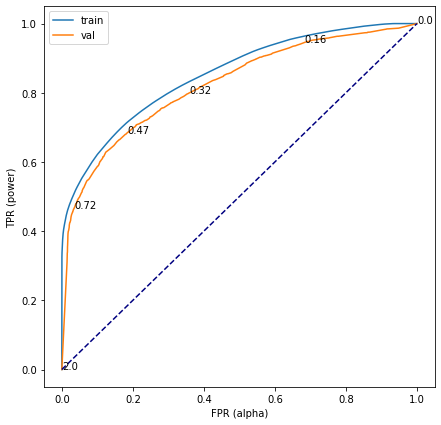

In [330]:
scores(model,X_train,X_val,y_train,y_val)
roc_plot(model,X_train,y_train,X_val,y_val)

# RANDOM FOREST CLASSIFIER

In [331]:
model = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=42)

In [332]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

train: 0.85 validation: 0.83


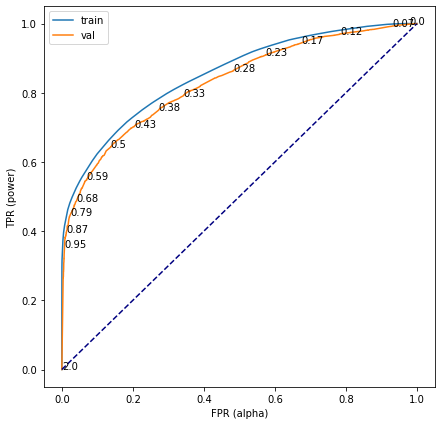

In [333]:
scores(model,X_train,X_val,y_train,y_val)
roc_plot(model,X_train,y_train,X_val,y_val)

### Grid search CV

In [334]:
param_grid = {'max_depth':range(1,50+1,10),'min_samples_leaf':[5,50,500]}

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.3min finished


train: 0.85 validation: 0.83
{'max_depth': 41, 'min_samples_leaf': 5}


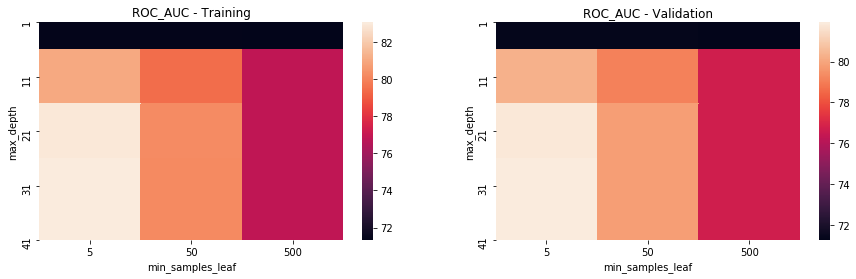

In [335]:
opt_model = GridSearchCV(model,param_grid,cv=skf,scoring='roc_auc',return_train_score=True,n_jobs=-1,verbose=1)
opt_model.fit(X_train,y_train)
best_model = opt_model.best_estimator_

scores(model,X_train,X_val,y_train,y_val)
print(opt_model.best_params_)
opt_plots(opt_model)

train: 0.83 validation: 0.83


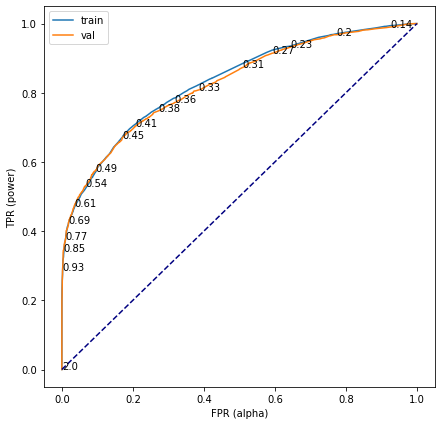

In [336]:
scores(opt_model,X_train,X_val,y_train,y_val)
roc_plot(opt_model,X_train,y_train,X_val,y_val)

In [337]:
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_val, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,4051,572,4623
1,1429,2414,3843
All,5480,2986,8466


### AdaBoost

In [341]:
model = AdaBoostClassifier(DecisionTreeClassifier(),random_state=42)

In [342]:
model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

train: 0.85 validation: 0.82


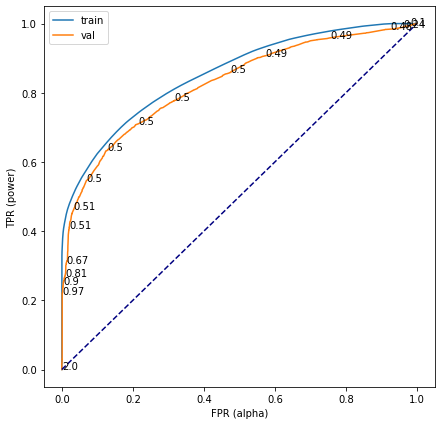

In [343]:
scores(model,X_train,X_val,y_train,y_val)
roc_plot(model,X_train,y_train,X_val,y_val)

In [365]:
opt_model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=41, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [366]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=41, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [367]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=41, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

train: 0.83 validation: 0.83


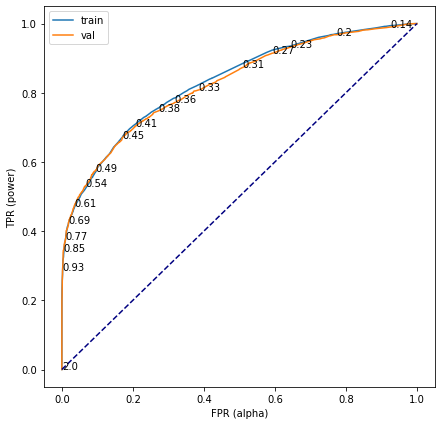

In [368]:
scores(model,X_train,X_val,y_train,y_val)
roc_plot(model,X_train,y_train,X_val,y_val)

In [369]:
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_val, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,4051,572,4623
1,1429,2414,3843
All,5480,2986,8466


In [371]:
final_model = model

# FINAL MODEL

The best model, that we got was the hyper tuned random forest classifier, as it didnt display of overfitting and also had a high area under the curve and accuracy.

In [382]:
final_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=41, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [383]:
final_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=41, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

train: 0.83 validation: 0.83


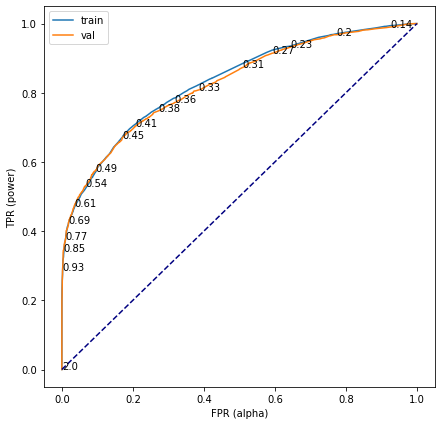

In [384]:
scores(final_model,X_train,X_val,y_train,y_val)
roc_plot(final_model,X_train,y_train,X_val,y_val)

In [385]:
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_val, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,4051,572,4623
1,1429,2414,3843
All,5480,2986,8466


In [386]:
TP = 2414
TN = 4051
FP = 572
FN = 1429

In [387]:
Precision = TP / (TP + FP)
Precision

0.8084393837910248

In [388]:
Recall = TP / (TP+FN)
Recall

0.6281550871714806

In [389]:
F1 = 2*((Precision*Recall)/(Precision+Recall))
F1

0.7069849172646068

# FEATURE IMPORTANCE

In [390]:
import matplotlib.pyplot as plt 
%matplotlib inline 

def create_plot_of_feature_importances(model, X):
    ''' 
    Inputs: 
    
    model: A trained ensemble model instance
    X: a dataframe of the features used to train the model
    '''
    
    feat_importances = model.feature_importances_

    features_and_importances = zip(X.columns, feat_importances)
    features_and_importances = sorted(features_and_importances, 
                                     key = lambda x: x[1], reverse=True)
    
    features = [i[0] for i in features_and_importances]
    importances = [i[1] for i in features_and_importances]
    
    plt.figure(figsize=(10, 6))
    plt.barh(features, importances)
    plt.gca().invert_yaxis()
    plt.title('Feature Importances')
    plt.xlabel('importance')
    for i in range(len(label)):
        plt.annotate(str(label[i]), xy=(label[i], features[i])) 
    